<a href="https://colab.research.google.com/github/Lithikhaa/cloths_classification/blob/main/cloths_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.api._v2.keras.datasets import fashion_mnist #dataset importing
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()# (xtrain,ytrain),(xtest,ytest)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_img.shape

(10000, 28, 28)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

train_img = training images will be trained -- 60000 img(xtrain)
train_labels = it shows that 1st,2nd,3rd etc... img of trained_img symbol in (ytrain)
test_img = evalute images
test_labels = it shows the image of predicated images 1st,2nd,3rd etc...



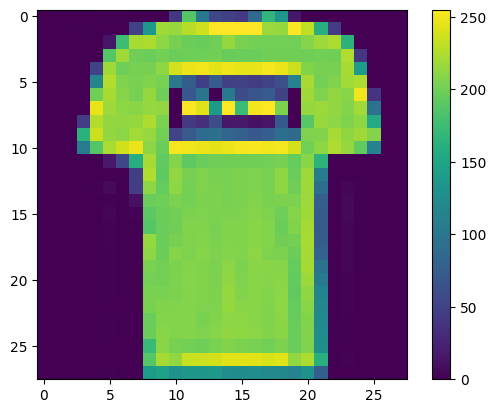

In [8]:
plt.figure()
plt.imshow(train_img[1])
plt.colorbar()
plt.grid(False)#if grid is true it shows in line..contains full of square
plt.show()
#it shows the image1 from trained_img

In [9]:
train_img = train_img / 255.0
test_img = test_img / 255.0
#there will be diff intensity so to normalise the value it divide the value by 255

<ipython-input-10-ba8b56f90407>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1) #x-5 , y-5 , i+1 for iteration upto 25


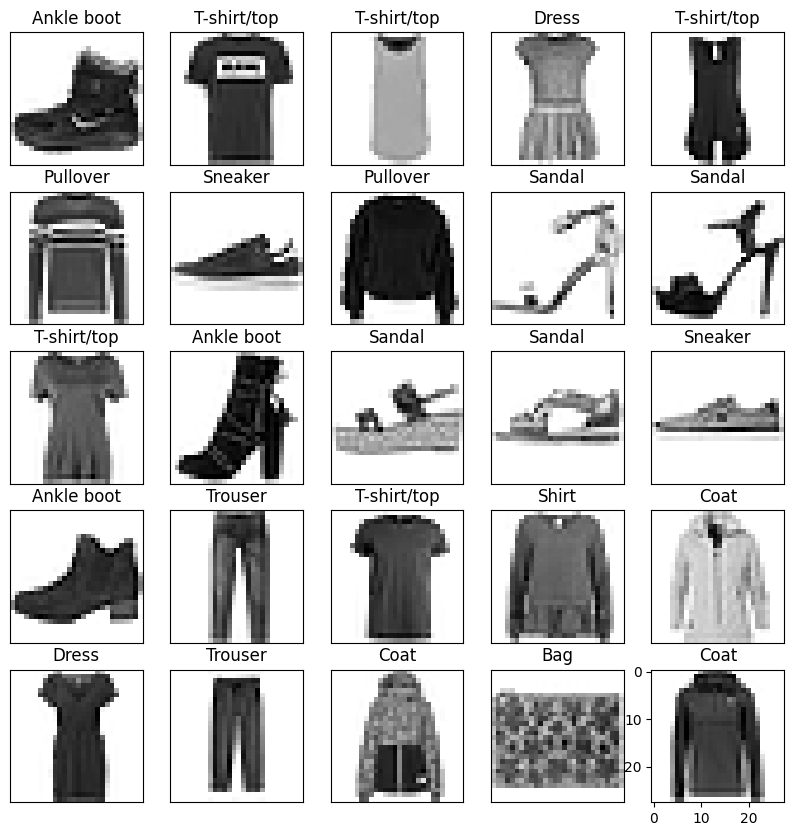

In [10]:
plt.figure(figsize=(10,10)) #x--10,y--10
for i in range(25): #range - 25 so it shows 25 images
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5,5,i+1) #x-5 , y-5 , i+1 for iteration upto 25
  plt.imshow(train_img[i], cmap=plt.cm.binary) #cmap is used to color -- binary means gray,black both if the intensity is 180 then it declare as 255(black)
  # if the intensity is 50 then it declare as 0 it give gray color
  plt.title(class_names[train_labels[i]])
plt.show()

In [11]:
#model building
# sequential -- for order
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#input layer
    tf.keras.layers.Dense(128, activation='relu'),#hiddenlayer(128)
    tf.keras.layers.Dense(10)#output layer
])

In [12]:
model.compile(optimizer= 'adam',#SparseCategoricalCrossentropy -- losscalculating
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])#activation func--from_logits(for loss layer --activationlayer //eg - class 10 in output checking which one is larger or greater value for class 10)

In [13]:
#model training
model.fit(train_img,train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5003 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3757 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3146 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2950 - accuracy: 0.8915


In [14]:

#comparing the model to test_dataset
test_loss, test_acc = model.evaluate(test_img, test_labels, verbose=2)#verbose--optional arugument used for setting in training & evaluating
print('\nTestaccuarcy:',test_acc)

313/313 - 1s - loss: 0.3513 - accuracy: 0.8736 - 545ms/epoch - 2ms/step

Testaccuarcy: 0.8736000061035156


313/313 - batchsize
2ms/step - batch epoch sec

In [15]:
#making prediction
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_img)

313/313 [==============================] - 1s 1ms/step


In [17]:
predictions[0]

array([2.95226208e-08, 5.37252198e-09, 1.46250745e-08, 1.29783373e-09,
       6.32998294e-08, 3.87564953e-03, 6.07460208e-07, 2.32363250e-02,
       8.06295429e-06, 9.72879112e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])#argmax--compare all the value of the output and gives the largest value

9

In [19]:
test_labels[1]

2

In [20]:
#full set of 10 class predictions
def plot_image(i,predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'green'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

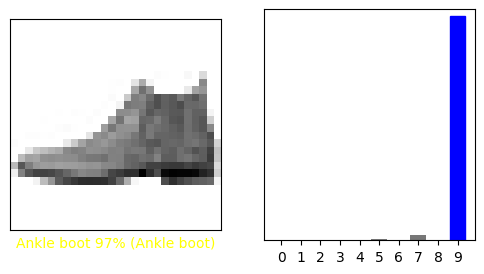

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

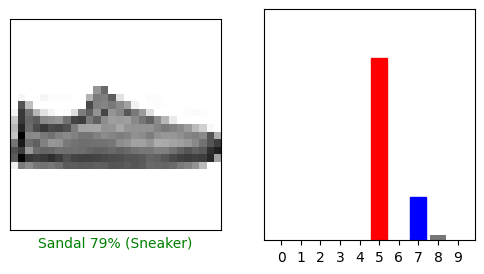

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

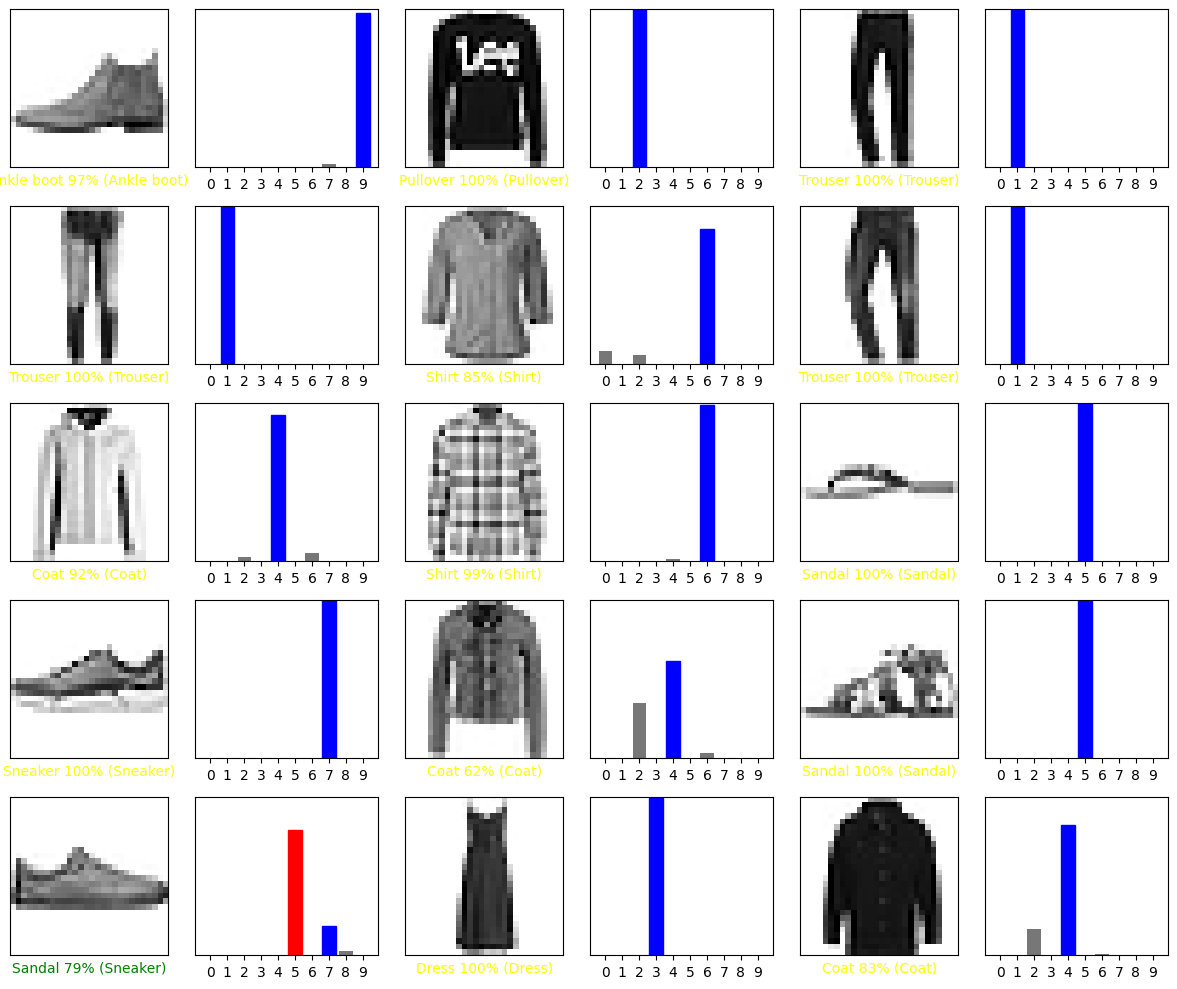

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
img = test_img[1]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))#dimension expansion

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[6.7408173e-06 1.0853601e-12 9.9927658e-01 2.4148898e-08 8.7818247e-05
  1.6528488e-10 6.2880089e-04 1.2961911e-17 4.7540821e-10 3.8955205e-13]]


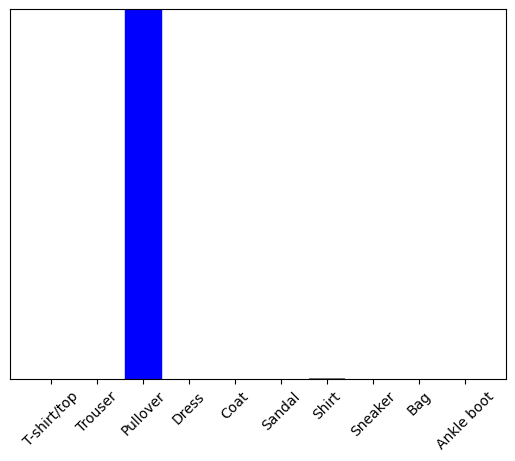

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2